In [124]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR,SVC
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Data Input

In [125]:
credit = pd.read_csv('credit_final.csv')

In [126]:
credit

,ID,LIMIT_BAL,SEX,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,age_40-60,age_60-79
0,1,20000,0,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,2682,1725,2682,3272,3455,3261,0,...,0,1,0,0,0,0,0,0,0,0
2,3,90000,0,29239,14027,13559,14331,14948,15549,1518,...,1,0,0,0,0,0,0,0,0,0
3,4,50000,0,46990,48233,49291,28314,28959,29547,2000,...,1,0,0,0,0,0,0,0,0,0
4,5,50000,1,8617,5670,35835,20940,19146,19131,2000,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,188948,192815,208365,88004,31237,15980,8500,...,1,0,0,0,0,0,0,0,0,0
29996,29997,150000,1,1683,1828,3502,8979,5190,0,1837,...,1,0,0,0,0,0,0,0,1,0
29997,29998,30000,1,3565,3356,2758,20878,20582,19357,0,...,1,0,0,0,0,0,0,0,0,0
29998,29999,80000,1,-1645,78379,76304,52774,11855,48944,85900,...,0,0,0,0,0,0,0,0,1,0


In [127]:
credit= credit.drop(['ID'],axis=1) #,'Def_nex_mt'
# drop duplicates
credit= credit.drop_duplicates()
# check for nulls
nulls = credit.isnull().sum()
nulls

LIMIT_BAL    0
SEX          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
            ..
PAY_6_6      0
PAY_6_7      0
PAY_6_8      0
age_40-60    0
age_60-79    0
Length: 81, dtype: int64

In [128]:
credit

,LIMIT_BAL,SEX,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,age_40-60,age_60-79
0,20000,0,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,2682,1725,2682,3272,3455,3261,0,1000,...,0,1,0,0,0,0,0,0,0,0
2,90000,0,29239,14027,13559,14331,14948,15549,1518,1500,...,1,0,0,0,0,0,0,0,0,0
3,50000,0,46990,48233,49291,28314,28959,29547,2000,2019,...,1,0,0,0,0,0,0,0,0,0
4,50000,1,8617,5670,35835,20940,19146,19131,2000,36681,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,188948,192815,208365,88004,31237,15980,8500,20000,...,1,0,0,0,0,0,0,0,0,0
29996,150000,1,1683,1828,3502,8979,5190,0,1837,3526,...,1,0,0,0,0,0,0,0,1,0
29997,30000,1,3565,3356,2758,20878,20582,19357,0,0,...,1,0,0,0,0,0,0,0,0,0
29998,80000,1,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,0,0,0,0,0,0,0,1,0


In [129]:
credit.Def_nex_mt.describe()

count   29762.00
mean        0.78
std         0.41
min         0.00
25%         1.00
50%         1.00
75%         1.00
max         1.00
Name: Def_nex_mt, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

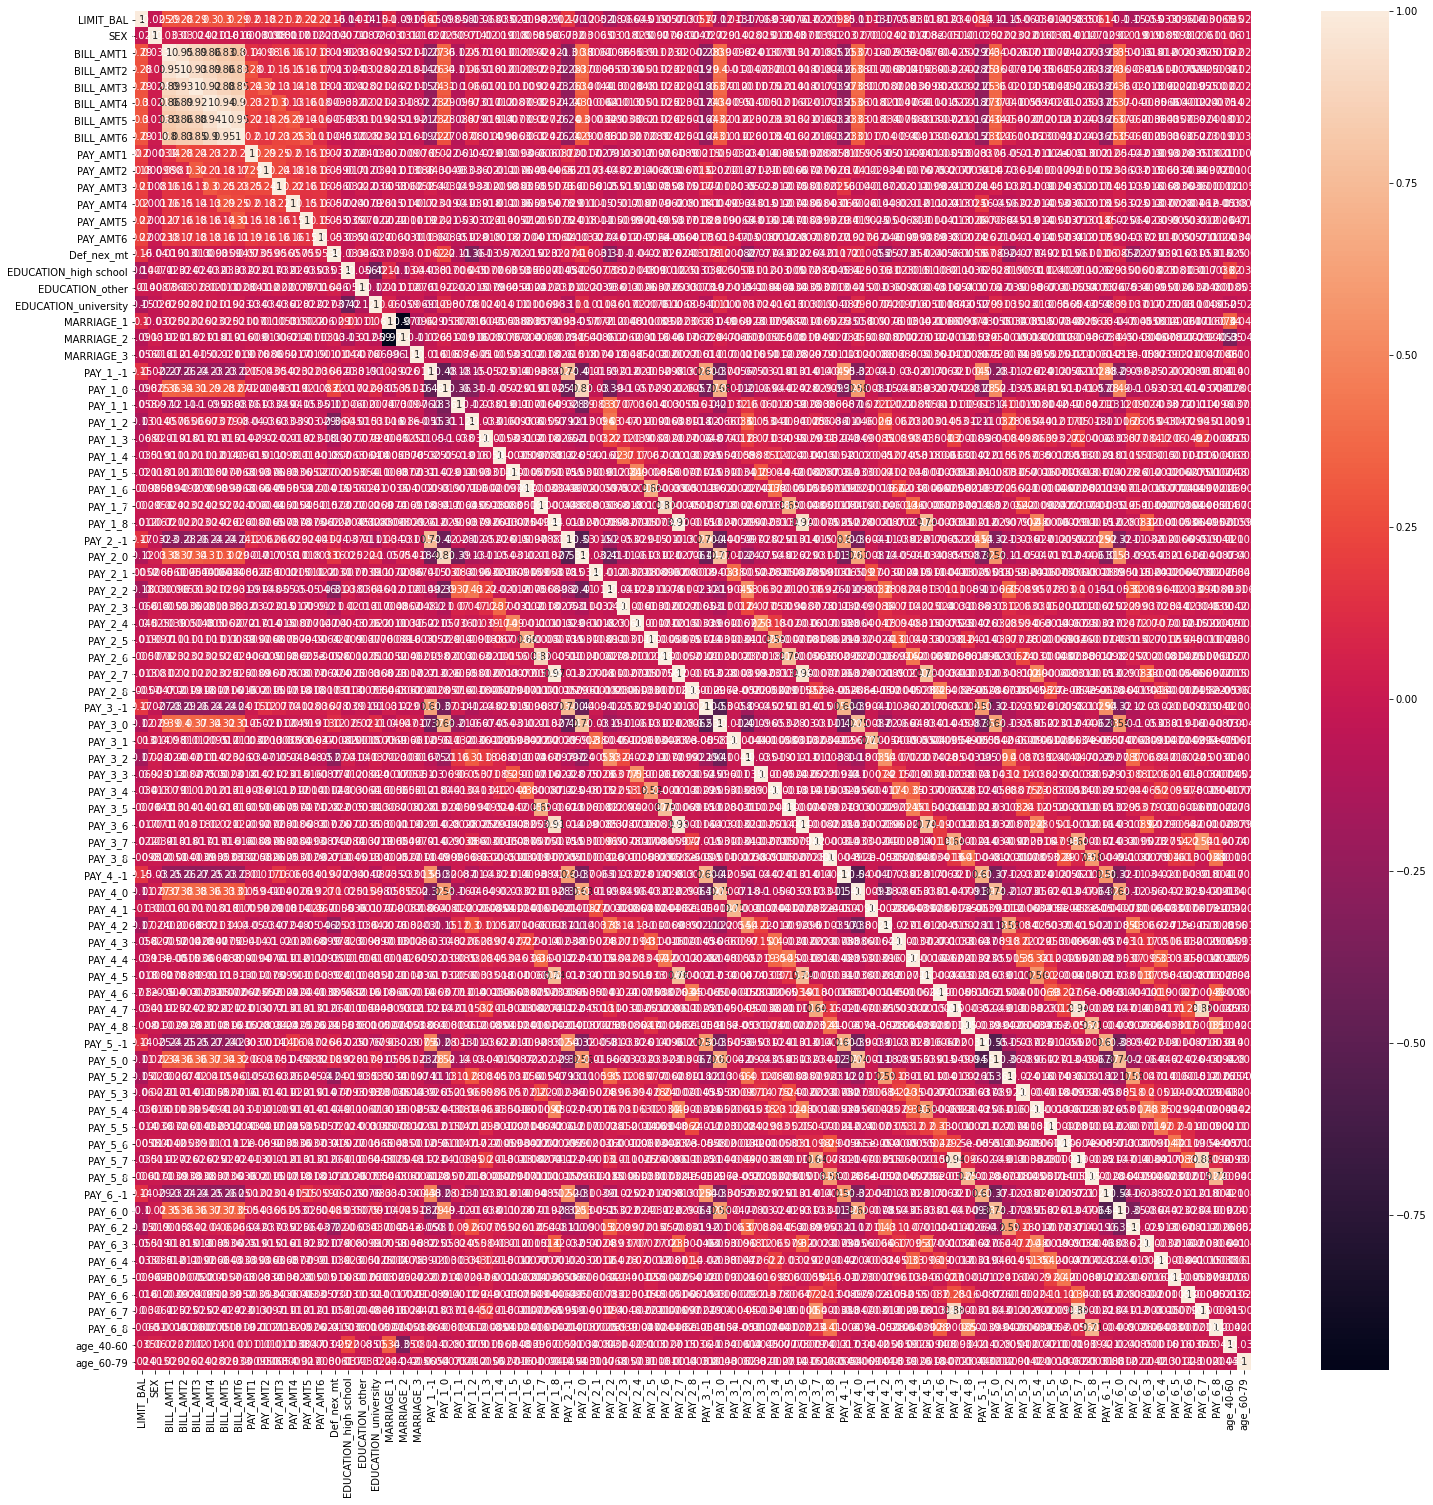

In [130]:
credit_corr = credit.corr ()
plt.figure(figsize=(25,25))
sns.heatmap(credit_corr,annot=True)
plt.show

## Building the model using all variables

In [131]:
# features
X = credit.iloc[:,1:]
# dep var
y= credit['LIMIT_BAL']
# SPLIT
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state=123)

In [132]:
algos_Class=[]
algos_Class.append(('Random Forest', RandomForestRegressor()))
algos_Class.append(('Linear Model', LinearRegression()))
algos_Class.append(('SVR', SVR()))

In [133]:
# Regression
results=[]
names=[]
for name,model in algos_Class:
    result = cross_val_score(model, X,y, cv=3)
    names.append (name)
    results.append(result)

In [134]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest 0.4284157169247633
Linear Model 0.3884531776178206
SVR -0.049857404018155714


Accuray results are too low

In [135]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29762 entries, 0 to 29999
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   LIMIT_BAL              29762 non-null  int64
 1   SEX                    29762 non-null  int64
 2   BILL_AMT1              29762 non-null  int64
 3   BILL_AMT2              29762 non-null  int64
 4   BILL_AMT3              29762 non-null  int64
 5   BILL_AMT4              29762 non-null  int64
 6   BILL_AMT5              29762 non-null  int64
 7   BILL_AMT6              29762 non-null  int64
 8   PAY_AMT1               29762 non-null  int64
 9   PAY_AMT2               29762 non-null  int64
 10  PAY_AMT3               29762 non-null  int64
 11  PAY_AMT4               29762 non-null  int64
 12  PAY_AMT5               29762 non-null  int64
 13  PAY_AMT6               29762 non-null  int64
 14  Def_nex_mt             29762 non-null  int64
 15  EDUCATION_high school  29762 non-nul

## Building the model not considering all the features

In [136]:
# features
X1 = credit.iloc[:,lambda data:[1,8,9,10,11,12,13,78,79]]
# dep var
y1 = credit['LIMIT_BAL']
# SPLIT
X1_train,X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = .25, random_state=123)

In [137]:
algos_Class1=[]
algos_Class1.append(('Random Forest', RandomForestRegressor()))
algos_Class1.append(('Linear Model', LinearRegression(normalize=True)))
algos_Class1.append(('SVR', SVR()))

In [138]:
# Regression
results1=[]
names1=[]
for name1,model1 in algos_Class1:
    result1 = cross_val_score(model1, X1,y1, cv=3)
    names1.append (name1)
    results1.append(result1)

In [139]:
for i in range(len(names1)):
    print(names1[i],results1[i].mean())

Random Forest 0.2976103406936344
Linear Model 0.11973468585667872
SVR -0.051009198101295374


Results are too low to consider a good estimation model

# Selection of Features
X1 = credit.iloc[:,lambda data: <br>
[1,              (Sex)<br>
8,9,10,11,12,13, (amount payed)<br>
78,79            (age)<br>
Random Forest 0.29760186250586834<br>
Linear Model 0.12083503857826423<br>
SVR -0.050560813063725986<br>
Same values for normalize True or False<br>
<br>
X1 = credit.iloc[:,lambda data: <br>
**All Data** (excluding Default fro next month) <br>
Random Forest 0.42720717809865966<br>
Linear Model 0.38609131389951434<br>
SVR -0.049531231871231464br><br>


In [140]:
print(cross_val_score(model1,X1,y1,cv=3))

[-0.03507552 -0.00465777 -0.1132943 ]


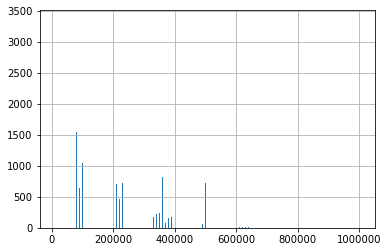

In [141]:
pd.set_option('display.float_format',lambda x:'%.2f' % x)
credit['LIMIT_BAL'].hist(bins=1000
                        )
plt.ticklabel_format(style='plain', axis='x', useOffset=False)

In [142]:
# defining bins
bins= [0,20000,40000,60000,80000,100000,
       120000,140000,160000,180000,200000,
       220000,240000,260000,280000,300000,
       320000,340000,360000,380000,400000,
       420000,440000,460000,480000,500000,
       520000,540000,560000,580000,600000,
       620000,640000,660000,680000,700000,
       720000,740000,760000,780000,800000,
       820000,840000,860000,880000,900000,
       920000,940000,960000,980000,1000000]
# naming groups
group_names= ['0-20000',
              '20000-40000',
              '40000-60000',
              '60000-80000',
              '80000-100000',
              
              '100000-120000',
              '120000-140000',
              '140000-160000',
              '160000-180000',
              '180000-200000',
              
              '200000-220000',
              '220000-240000',
              '240000-260000',
              '260000-280000',
              '280000-300000',
              
              '300000-320000',
              '320000-340000',
              '340000-360000',
              '360000-380000',
              '380000-400000',
              
              '400000-420000',
              '420000-440000',
              '440000-460000',
              '460000-480000',
              '480000-500000',
              
              '500000-520000',
              '520000-540000',
              '540000-560000',
              '560000-580000',
              '580000-600000',
              
              '600000-620000',
              '620000-640000',
              '640000-660000',
              '660000-680000',
              '680000-700000',
              
              '700000-720000',
              '720000-740000',
              '740000-760000',
              '760000-780000',
              '780000-800000',
              
              '800000-820000',
              '820000-840000',
              '840000-860000',
              '860000-880000',
              '880000-900000',
              
              '900000-920000',
              '920000-940000',
              '940000-960000',
              '960000-980000',
              '980000-100000']
# Adding limit balance ranges
credit['LIMIT_BAL_RANG']=pd.cut(credit["LIMIT_BAL"], bins, labels=group_names)
credit

,LIMIT_BAL,SEX,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,age_40-60,age_60-79,LIMIT_BAL_RANG
0,20000,0,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0-20000
1,120000,0,2682,1725,2682,3272,3455,3261,0,1000,...,1,0,0,0,0,0,0,0,0,100000-120000
2,90000,0,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,0,80000-100000
3,50000,0,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,0,40000-60000
4,50000,1,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,1,0,40000-60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,0,0,0,0,0,0,0,200000-220000
29996,150000,1,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,0,0,0,0,0,1,0,140000-160000
29997,30000,1,3565,3356,2758,20878,20582,19357,0,0,...,0,0,0,0,0,0,0,0,0,20000-40000
29998,80000,1,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,0,0,0,0,0,0,1,0,60000-80000


In [143]:
le= LabelEncoder()
le.fit(credit['LIMIT_BAL_RANG'])

LabelEncoder()

In [144]:
credit['LIMIT_BAL_RANG'] = le.transform(credit['LIMIT_BAL_RANG'])

In [145]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29762 entries, 0 to 29999
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   LIMIT_BAL              29762 non-null  int64
 1   SEX                    29762 non-null  int64
 2   BILL_AMT1              29762 non-null  int64
 3   BILL_AMT2              29762 non-null  int64
 4   BILL_AMT3              29762 non-null  int64
 5   BILL_AMT4              29762 non-null  int64
 6   BILL_AMT5              29762 non-null  int64
 7   BILL_AMT6              29762 non-null  int64
 8   PAY_AMT1               29762 non-null  int64
 9   PAY_AMT2               29762 non-null  int64
 10  PAY_AMT3               29762 non-null  int64
 11  PAY_AMT4               29762 non-null  int64
 12  PAY_AMT5               29762 non-null  int64
 13  PAY_AMT6               29762 non-null  int64
 14  Def_nex_mt             29762 non-null  int64
 15  EDUCATION_high school  29762 non-nul

In [146]:
X_2 = credit.iloc[:,:]
y_2= credit['LIMIT_BAL_RANG']
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2,test_size=0.5,random_state=123)

In [147]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

In [148]:
algo_2 = DecisionTreeClassifier(max_depth=8)
model_2 = algo_2.fit (X_2_train , y_2_test)

In [149]:
y_2_pred_2 = model_2.predict(X_2_test)

In [150]:
print (classification_report(y_2_test,y_2_pred_2))

              precision    recall  f1-score   support

           0       0.03      0.02      0.02      1230
           1       0.00      0.00      0.00       651
           2       0.00      0.00      0.00       725
           3       0.01      0.00      0.00       906
           4       0.03      0.00      0.00       796
           5       0.08      0.00      0.01       860
           6       0.00      0.00      0.00       901
           7       0.06      0.00      0.00       572
           8       0.00      0.00      0.00       657
           9       0.00      0.00      0.00       430
          10       0.00      0.00      0.00       365
          11       0.00      0.00      0.00       447
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       184
          14       0.00      0.00      0.00       517
          15       0.00      0.00      0.00       121
          16       0.00      0.00      0.00       228
          17       0.16    

C:\Users\garyg\.conda\envs\Credone\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
print("Accuracy:",metrics.accuracy_score(y_2_test, y_2_pred_2))

Accuracy: 0.14064914992272023


## Changing the Independent variable to Default next month and using Decision Trees

In [152]:
X_3 = credit.iloc[:,:]
y_3= credit['Def_nex_mt']
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3,y_3,test_size=0.5,random_state=123)

In [153]:
algo_3 = DecisionTreeClassifier(max_depth=4)
model_3 = algo_3.fit (X_3_train , y_3_test)

In [154]:
y_3_pred_3 = model_3.predict(X_3_test)

In [155]:
print (classification_report(y_3_test,y_3_pred_3))

              precision    recall  f1-score   support

           0       0.26      0.00      0.01      3302
           1       0.78      1.00      0.87     11579

    accuracy                           0.78     14881
   macro avg       0.52      0.50      0.44     14881
weighted avg       0.66      0.78      0.68     14881



In [156]:
print("Accuracy:",metrics.accuracy_score(y_3_test, y_3_pred_3))

Accuracy: 0.7768967139305154


Accuracy score using Decision Tree Classifier, this is the best model we could use with this dataset